## Gráficos da The Economist - Códigos e Estilos
## Fonte: https://towardsdatascience.com/making-economist-style-plots-in-matplotlib-e7de6d679739 

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
# Configurando o plot para ele sair em alta definição 
plt.rcParams['figure.dpi'] = 100

## Cores 


1.   Red, #DB444B
2.   Blue, #006BA2
3.   Cyan, #3EBCD2
4.   Green, #379A8B
5.   Yellow, #EBB434
6.   Olive, #B4BA39
7.   Purple, #9A607F
8.   Gold, #D1B07C




## Gráifico de Linhas

In [3]:
# Lendo o data set com o pandas 
data_set_Alemanha = pd.read_excel('PIB, Pessoas Empregadas e Horas Trabalhadas - Alemanha (1997 - 2019).xlsx')
data_set_Franca = pd.read_excel('PIB, Pessoas Empregadas e Horas Trabalhadas - França (1997 - 2019).xlsx')
data_set_UK = pd.read_excel('PIB, Pessoas Empregadas e Horas Trabalhadas - Reino Unido (1997 - 2019).xlsx')
data_set_Estados_Unidos_Novo = pd.read_excel('PIB, Pessoas Empregadas e Horas Trabalhadas - Estados Unidos (1997 - 2019).xlsx')
data_set_Italia = pd.read_excel('PIB, Pessoas Empregadas e Horas Trabalhadas - Itália (1997 - 2019).xlsx')
data_set_Brasil = pd.read_excel('PIB, Pessoas Empregadas e Horas Trabalhadas - Brasil (1997 - 2019).xlsx')
data_set_Chile = pd.read_excel('PIB, Pessoas Empregadas e Horas Trabalhadas - Chile (1997 - 2019).xlsx')

In [ ]:
# Vizualizando o data set da Alemanha, por exemplo
data_set_Alemanha

In [4]:
# Calculando a produtividade da Alemanha 
data_set_Alemanha["Produtividade"] = data_set_Alemanha['RGDPO']/(data_set_Alemanha['EMP']*data_set_Alemanha['AVH'])
data_set_Alemanha

,VariableCode,RegionCode,YearCode,RGDPO,EMP,AVH,Produtividade
0,rgdpo,DEU,1997,2767329.50,37.770332,1507.676130,48.596166
1,rgdpo,DEU,1998,2862586.00,38.217930,1504.559034,49.783125
2,rgdpo,DEU,1999,2978213.00,38.807255,1491.513292,51.453593
3,rgdpo,DEU,2000,3035471.75,39.603115,1465.937805,52.285504
4,rgdpo,DEU,2001,3076616.00,39.451439,1458.165032,53.481523
5,rgdpo,DEU,2002,3065723.00,39.233551,1448.923511,53.929927
6,rgdpo,DEU,2003,3140563.50,38.825451,1443.408008,56.040495
7,rgdpo,DEU,2004,3231047.25,38.972916,1442.584218,57.469740
8,rgdpo,DEU,2005,3391866.50,38.923668,1432.423495,60.835006
9,rgdpo,DEU,2006,3470312.00,39.186344,1453.188534,60.941314


In [13]:
# Calculando a produtividade do Brasil 
data_set_Brasil["Produtividade"] = data_set_Brasil['RGDPO']/(data_set_Brasil['EMP']*data_set_Brasil['AVH'])
data_set_Brasil

,VariableCode,RegionCode,YearCode,RGDPO,EMP,AVH,Produtividade
0,rgdpo,BRA,1997-01-01,1761591.875,62.795872,1845.731727,15.198671
1,rgdpo,BRA,1998-01-01,1687990.125,62.611366,1841.000000,14.644108
2,rgdpo,BRA,1999-01-01,1630691.750,65.889603,1813.842815,13.644428
3,rgdpo,BRA,2000-01-01,1653572.375,68.130455,1837.927050,13.205464
4,rgdpo,BRA,2001-01-01,1645849.750,68.456390,1828.326394,13.149900
5,rgdpo,BRA,2002-01-01,1657569.000,71.253647,1818.725739,12.790788
6,rgdpo,BRA,2003-01-01,1651363.000,72.304581,1811.182515,12.609984
7,rgdpo,BRA,2004-01-01,1738794.250,76.159279,1803.126089,12.661912
8,rgdpo,BRA,2005-01-01,1802951.500,78.414780,1783.131227,12.894450
9,rgdpo,BRA,2006-01-01,1967472.000,80.879120,1779.167851,13.672729


In [6]:
# Calculando a produtividade do Chile
data_set_Chile["Produtividade"] = data_set_Chile['RGDPO']/(data_set_Chile['EMP']*data_set_Chile['AVH'])
data_set_Chile

,VariableCode,RegionCode,YearCode,RGDPO,EMP,AVH,Produtividade
0,rgdpo,CHL,1997,182729.593750,5.265700,2256.0,15.382030
1,rgdpo,CHL,1998,180734.671875,5.385845,2299.0,14.596497
2,rgdpo,CHL,1999,172964.484375,5.366338,2277.0,14.155196
3,rgdpo,CHL,2000,179409.281250,5.536605,2263.0,14.319135
4,rgdpo,CHL,2001,178616.734375,5.619427,2242.0,14.177331
5,rgdpo,CHL,2002,180072.953125,5.736024,2250.0,13.952596
6,rgdpo,CHL,2003,188146.781250,5.895638,2235.0,14.278694
7,rgdpo,CHL,2004,209904.796875,6.012093,2232.0,15.642367
8,rgdpo,CHL,2005,235796.343750,6.230428,2157.0,17.545632
9,rgdpo,CHL,2006,275647.750000,6.450593,2165.0,19.737718


In [7]:
# Calculando a produtividade dos Estados Unidos 
data_set_Estados_Unidos_Novo["Produtividade"] = data_set_Estados_Unidos_Novo['RGDPO']/(data_set_Estados_Unidos_Novo['EMP']*data_set_Estados_Unidos_Novo['AVH'])
data_set_Estados_Unidos_Novo

,VariableCode,RegionCode,YearCode,RGDPO,EMP,AVH,Produtividade
0,rgdpo,USA,1997,12360252.0,132.362579,1828.488276,51.070478
1,rgdpo,USA,1998,12924324.0,134.500900,1839.196147,52.246187
2,rgdpo,USA,1999,13526821.0,136.756470,1841.333456,53.717454
3,rgdpo,USA,2000,14095967.0,138.636108,1844.853980,55.113313
4,rgdpo,USA,2001,14205419.0,138.646805,1823.659338,56.182423
5,rgdpo,USA,2002,14396938.0,138.152084,1806.690813,57.680479
6,rgdpo,USA,2003,14799683.0,138.690857,1790.841678,59.586433
7,rgdpo,USA,2004,15372598.0,140.270187,1789.527460,61.241177
8,rgdpo,USA,2005,15920553.0,142.493301,1787.013857,62.522420
9,rgdpo,USA,2006,16386528.0,145.094147,1787.351164,63.186917


In [8]:
# Calculando a produtividade da França 
data_set_Franca["Produtividade"] = data_set_Franca['RGDPO']/(data_set_Franca['EMP']*data_set_Franca['AVH'])
data_set_Franca

,VariableCode,RegionCode,YearCode,RGDPO,EMP,AVH,Produtividade
0,rgdpo,FRA,1997,1819024.125,24.003853,1595.645328,47.492074
1,rgdpo,FRA,1998,1921072.875,24.439314,1585.289681,49.584530
2,rgdpo,FRA,1999,2011288.125,25.020395,1578.304510,50.931835
3,rgdpo,FRA,2000,2128715.250,25.625225,1558.338802,53.307461
4,rgdpo,FRA,2001,2185648.250,25.974291,1537.956604,54.713247
5,rgdpo,FRA,2002,2197271.750,26.102304,1503.886735,55.974445
6,rgdpo,FRA,2003,2144133.750,26.124199,1507.256771,54.452979
7,rgdpo,FRA,2004,2188098.250,26.165403,1530.856012,54.626709
8,rgdpo,FRA,2005,2372596.750,26.334572,1532.075909,58.805424
9,rgdpo,FRA,2006,2432615.500,26.609587,1515.011200,60.341972


In [9]:
# Calculando a produtividade da Itália 
data_set_Italia["Produtividade"] = data_set_Italia['RGDPO']/(data_set_Italia['EMP']*data_set_Italia['AVH'])
data_set_Italia

,VariableCode,RegionCode,YearCode,RGDPO,EMP,AVH,Produtividade
0,rgdpo,ITA,1997,1856405.25,22.111740,1859.863898,45.140743
1,rgdpo,ITA,1998,1942746.25,22.267738,1873.132928,46.576985
2,rgdpo,ITA,1999,1997615.00,22.472488,1869.878018,47.538705
3,rgdpo,ITA,2000,2046561.75,22.917969,1850.197971,48.264802
4,rgdpo,ITA,2001,2047270.50,23.430450,1837.636217,47.548306
5,rgdpo,ITA,2002,2019462.75,23.917112,1826.190095,46.236092
6,rgdpo,ITA,2003,2028394.50,24.322321,1815.103813,45.945813
7,rgdpo,ITA,2004,2040372.75,24.474260,1814.615542,45.942573
8,rgdpo,ITA,2005,2123677.25,24.632336,1811.101718,47.603631
9,rgdpo,ITA,2006,2202942.75,25.155275,1811.851615,48.333863


In [10]:
# Calculando a produtividade do Reino Unido 
data_set_UK["Produtividade"] = data_set_UK['RGDPO']/(data_set_UK['EMP']*data_set_UK['AVH'])
data_set_UK

,VariableCode,RegionCode,YearCode,RGDPO,EMP,AVH,Produtividade
0,rgdpo,GBR,1997,1829166.375,26.408014,1721.195442,40.242715
1,rgdpo,GBR,1998,1879454.625,26.690899,1716.999440,41.010824
2,rgdpo,GBR,1999,1958917.875,27.067028,1708.610393,42.357724
3,rgdpo,GBR,2000,2075158.750,27.380348,1692.953954,44.767951
4,rgdpo,GBR,2001,2121908.250,27.595715,1695.976472,45.338290
5,rgdpo,GBR,2002,2123617.000,27.803614,1678.561396,45.502758
6,rgdpo,GBR,2003,2166739.250,28.060053,1669.380343,46.255446
7,rgdpo,GBR,2004,2220801.250,28.353535,1666.715738,46.993842
8,rgdpo,GBR,2005,2377112.250,28.672586,1669.737173,49.651766
9,rgdpo,GBR,2006,2415816.250,29.001076,1663.985723,50.061078


In [14]:
# Transformando nossos data sets em séries temporais 
data_set_Alemanha['YearCode'] = pd.to_datetime(data_set_Alemanha['YearCode'], format='%Y')
data_set_Franca['YearCode'] = pd.to_datetime(data_set_Franca['YearCode'], format='%Y')
data_set_Estados_Unidos_Novo['YearCode'] = pd.to_datetime(data_set_Estados_Unidos_Novo['YearCode'], format='%Y')
data_set_UK['YearCode'] = pd.to_datetime(data_set_UK['YearCode'], format='%Y')
data_set_Italia['YearCode'] = pd.to_datetime(data_set_Italia['YearCode'], format='%Y')
data_set_Brasil['YearCode'] = pd.to_datetime(data_set_Brasil['YearCode'], format='%Y')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


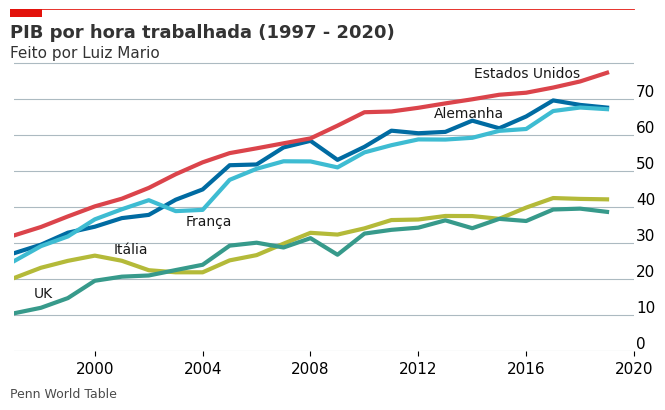

In [ ]:
# Gerando o gráfico 
# Configurando o tamanho do gráfico
fig, ax = plt.subplots(figsize=(8,4))
# Criando o grid
ax.grid(which="major", axis='y', color='#758D99', alpha=0.6, zorder=1)
# Plotando os dados 
ax.plot(data_set_Alemanha[data_set_Alemanha['RegionCode'] == 'DEU']['YearCode'], 
        data_set_Alemanha[data_set_Alemanha['RegionCode'] == 'DEU']['Produtividade'], 
        color='#006BA2', #Azul
        linewidth=3)
ax.plot(data_set_Franca[data_set_Franca['RegionCode'] == 'FRA']['YearCode'], 
        data_set_Franca[data_set_Franca['RegionCode'] == 'FRA']['Produtividade'], 
        color='#3EBCD2', #Cyan
        linewidth=3)
ax.plot(data_set_Estados_Unidos_Novo[data_set_Estados_Unidos_Novo['RegionCode'] == 'USA']['YearCode'], 
        data_set_Estados_Unidos_Novo[data_set_Estados_Unidos_Novo['RegionCode'] == 'USA']['Produtividade'], 
        color='#DB444B', #Vermelho
        linewidth=3)
ax.plot(data_set_Italia[data_set_Italia['RegionCode'] == 'ITA']['YearCode'], 
        data_set_Italia[data_set_Italia['RegionCode'] == 'ITA']['Produtividade'], 
        color='#B4BA39', #Oliva
        linewidth=3)
ax.plot(data_set_UK[data_set_UK['RegionCode'] == 'GBR']['YearCode'], 
        data_set_UK[data_set_UK['RegionCode'] == 'GBR']['Produtividade'], 
        color='#379A8B', #Verde
        linewidth=3)
# Removendo os eixos
ax.set_frame_on(False)
ax.tick_params(top=False)
ax.tick_params(labeltop=False)
# Configurando um limte para o y, afim de fazermos um plot maior 
ax.set_ylim(35,77)
# Configurando o limite para x 
ax.set_xlim(pd.datetime(1997, 1, 1), pd.datetime(2020, 1, 1))
# Formando o tamanho da legenda do eixo x 
ax.xaxis.set_tick_params(labelsize=11) 
# Formando o tamanho da legenda do eixo y 
ax.set_yticklabels(np.arange(0,80,10), 
                   ha = 'left',
                   verticalalignment='bottom')
ax.yaxis.set_tick_params(pad=-2,
                         labeltop=True,
                         labelbottom=False,
                         bottom=False,
                         labelsize=11)
# Adicionando as legendas para cada um dos países 
ax.text(x=.70, y=.81, s='Estados Unidos', transform=fig.transFigure, size=10, alpha=.9)
ax.text(x=.34, y=.44, s='França', transform=fig.transFigure, size=10, alpha=.9)
ax.text(x=.65, y=.71, s='Alemanha', transform=fig.transFigure, size=10, alpha=.9)
ax.text(x=.15, y=.26, s='UK', transform=fig.transFigure, size=10, alpha=.9)
ax.text(x=.25, y=.37, s='Itália', transform=fig.transFigure, size=10, alpha=.9)
# Adicionando as linhas 
ax.plot([0.12, .9],                 
        [.98, .98],                  
        transform=fig.transFigure,  
        clip_on=False, 
        color='#E3120B', 
        linewidth=.6)
ax.add_patch(plt.Rectangle((0.12,.98),                 
                           0.04,                       
                           -0.02,                      
                           facecolor='#E3120B', 
                           transform=fig.transFigure, 
                           clip_on=False, 
                           linewidth = 0))
# Adicionando título e subtítulo 
ax.text(x=0.12, y=.91, s="PIB por hora trabalhada (1997 - 2020)", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8)
ax.text(x=0.12, y=.86, s="Feito por Luiz Mario", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8)
# Adicionando o texto da fonte 
ax.text(x=0.12, y=0.01, s="""Penn World Table""", transform=fig.transFigure, ha='left', fontsize=9, alpha=.7)
# Plotando o gráfico            
plt.savefig('/content/Gráficos',    # Set path and filename
            dpi = 300,                     # Set dots per inch
            bbox_inches="tight",           # Remove extra whitespace around plot
            facecolor='white')             # Set background color to white

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


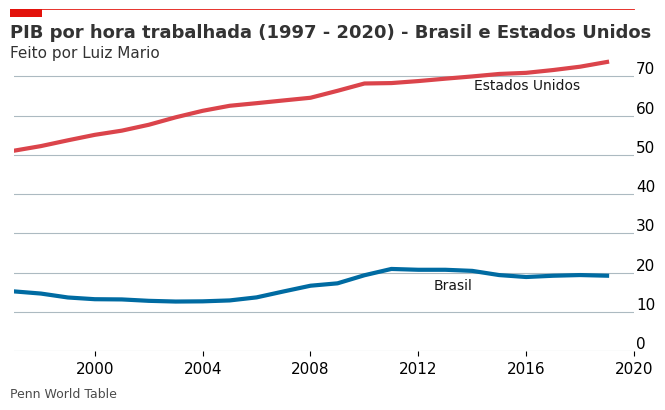

In [28]:
# Gráfico Estados Unidos x Brasil 
# Configurando o tamanho do gráfico
fig, ax = plt.subplots(figsize=(8,4))
# Criando o grid
ax.grid(which="major", axis='y', color='#758D99', alpha=0.6, zorder=1)
# Plotando os dados 
ax.plot(data_set_Brasil[data_set_Brasil['RegionCode'] == 'BRA']['YearCode'], 
        data_set_Brasil[data_set_Brasil['RegionCode'] == 'BRA']['Produtividade'], 
        color='#006BA2', #Azul
        linewidth=3)
ax.plot(data_set_Estados_Unidos_Novo[data_set_Estados_Unidos_Novo['RegionCode'] == 'USA']['YearCode'], 
        data_set_Estados_Unidos_Novo[data_set_Estados_Unidos_Novo['RegionCode'] == 'USA']['Produtividade'], 
        color='#DB444B', #Vermelho
        linewidth=3)
# Removendo os eixos
ax.set_frame_on(False)
ax.tick_params(top=False)
ax.tick_params(labeltop=False)
# Configurando um limte para o y, afim de fazermos um plot maior 
ax.set_ylim(0,77)
# Configurando o limite para x 
ax.set_xlim(pd.datetime(1997, 1, 1), pd.datetime(2020, 1, 1))
# Formando o tamanho da legenda do eixo x 
ax.xaxis.set_tick_params(labelsize=11) 
# Formando o tamanho da legenda do eixo y 
ax.set_yticklabels(np.arange(0,80,10), 
                   ha = 'left',
                   verticalalignment='bottom')
ax.yaxis.set_tick_params(pad=-2,
                         labeltop=True,
                         labelbottom=False,
                         bottom=False,
                         labelsize=11)
# Adicionando as legendas para cada um dos países 
ax.text(x=.70, y=.78, s='Estados Unidos', transform=fig.transFigure, size=10, alpha=.9)
ax.text(x=.65, y=.28, s='Brasil', transform=fig.transFigure, size=10, alpha=.9)
# Adicionando as linhas 
ax.plot([0.12, .9],                 
        [.98, .98],                  
        transform=fig.transFigure,  
        clip_on=False, 
        color='#E3120B', 
        linewidth=.6)
ax.add_patch(plt.Rectangle((0.12,.98),                 
                           0.04,                       
                           -0.02,                      
                           facecolor='#E3120B', 
                           transform=fig.transFigure, 
                           clip_on=False, 
                           linewidth = 0))
# Adicionando título e subtítulo 
ax.text(x=0.12, y=.91, s="PIB por hora trabalhada (1997 - 2020) - Brasil e Estados Unidos", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8)
ax.text(x=0.12, y=.86, s="Feito por Luiz Mario", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8)
# Adicionando o texto da fonte 
ax.text(x=0.12, y=0.01, s="""Penn World Table""", transform=fig.transFigure, ha='left', fontsize=9, alpha=.7)
# Plotando o gráfico            
plt.savefig('/content/Gráficos',    # Set path and filename
            dpi = 300,                     # Set dots per inch
            bbox_inches="tight",           # Remove extra whitespace around plot
            facecolor='white')             # Set background color to white